In this project we are going to predict house prices from district of California by training and

testing an appropriate machine learning model on a data set containing information on more than 20.000

districts in California.



Each data point is district in California and the color displace the median

house prices and the districts and dark blue stands for lower house prices and dark red for high house

prices are expensive districts.

And actually we try to understand why some districts are more expensive than others.

And we try to find the most important features that determine house prices, for instance, the location

or the median income.

And finally, we are going to train and test the machine learning model with Sckit learn that allows

us to predict prices for districts where we don't have any information on house prices.

But the main focus is on:
1) importing and inspecting the data set.

2) explanatory data analysis with Pendas and Seabourne to understand the data and to select and create appropriate features and also to select an appropriate model.

3) data preprocessing and feature engineering with Pandas.

So typically, when creating a running machine learning system, it makes a lot of sense to put those

things into website, get learn preprocessing pipeline.

However, in those cases like ours, where we want to train and test the machine learning model only

once for a specific task, we can do this as well with simple and straightforward pendas code.

All right.

This was a short introduction and looking forward to seeing you in the next lectures and videos by.

You can download the file from:

https://github.com/sonarsushant/California-House-Price-Prediction/blob/master/housing.csv

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
df= pd.read_csv("housing.csv")

In [9]:
df.head(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,NEAR BAY
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,NEAR BAY
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100,NEAR BAY
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300,NEAR BAY
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,NEAR BAY


In [10]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

- longitude: A measure of how far west a house is; a higher value is farther west.

- latitude: A measure of how far north a house is; a higher value is farther north.

- housing_median_age: Median age of a house within a district; a lower number is a newer building.

- total_rooms: Total number of rooms within a district.

- total_bedrooms: Total number of bedrooms within a district.

- population: Total number of people residing within a district.

- households: Total number of households, a group of people residing within a home unit, for a district.

- median_income: Median income for households within a district of houses (measured in tens of thousands of US Dollars).

- median_house_value: Median house value for households within a district (measured in US Dollars).

- ocean_proximity: Location of the house w.r.t ocean/sea.

This dataset seems pretty clean. We have just sum null values in total_bedrooms.

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  int64  
 3   total_rooms         20640 non-null  int64  
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  int64  
 6   households          20640 non-null  int64  
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  int64  
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(4), int64(5), object(1)
memory usage: 1.6+ MB


We can look at the rows where we have null values in total_bedrooms column, we have 207 rows.

In [12]:
df[df.total_bedrooms.isna()==True]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
290,-122.16,37.77,47,1256,NaN,570,218,4.3750,161900,NEAR BAY
341,-122.17,37.75,38,992,NaN,732,259,1.6196,85100,NEAR BAY
538,-122.28,37.78,29,5154,NaN,3741,1273,2.5762,173400,NEAR BAY
563,-122.24,37.75,45,891,NaN,384,146,4.9489,247100,NEAR BAY
696,-122.10,37.69,41,746,NaN,387,161,3.9063,178400,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20267,-119.19,34.20,18,3620,NaN,3171,779,3.3409,220500,NEAR OCEAN
20268,-119.18,34.19,19,2393,NaN,1938,762,1.6953,167400,NEAR OCEAN
20372,-118.88,34.17,15,4260,NaN,1701,669,5.1033,410700,<1H OCEAN
20460,-118.75,34.29,17,5512,NaN,2734,814,6.6073,258100,<1H OCEAN


We can check for if we have any rows duplicated:--> We do not have any.

In [13]:
df[df.duplicated()]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity


Next we can get some summary statistic on the numerical columns with the describe:

We can see that the avarage of age of the houses is almost 28 years or the avarage of house values is 206.000$.

In [14]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


We can have some statistic data of object columns by passing "O" for object:

- How many different category of houses we have? 5 categories.

- Which one is the most frecuentry category? Less than one houre from the Ocean.
- How many times it has repeated? 9136 in total 20640 entries.

In [15]:
df.describe(include="O")

,ocean_proximity
count,20640
unique,5
top,<1H OCEAN
freq,9136


- What category is the least frequency category? The category of ISLAND.

In [16]:
df.ocean_proximity.value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

For numerical columns is more usefull to project the value counts method as a bins in a histogram. For example visualize the data depends on housing_median_age.

In [17]:
df.housing_median_age.min()

1

In [18]:
df.housing_median_age.max()

52

<AxesSubplot: xlabel='housing_median_age', ylabel='Count'>

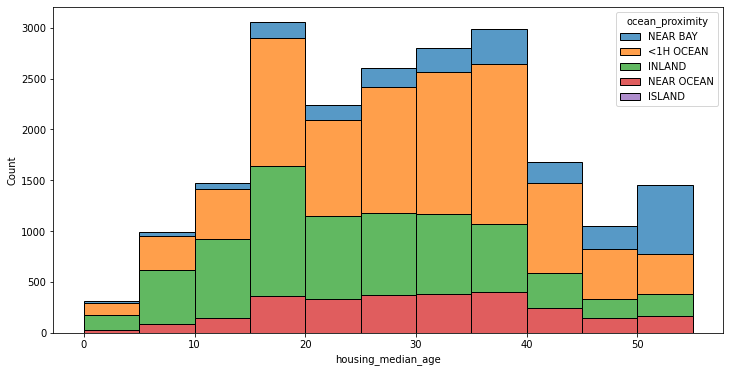

In [19]:
plt.figure(figsize=(12,6))

sns.histplot(x=df.housing_median_age,hue=df.ocean_proximity, multiple='stack', bins=np.arange(0,60,5))


## Data cleaning

There is no so much to do as we just have some missing values in one column.

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  int64  
 3   total_rooms         20640 non-null  int64  
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  int64  
 6   households          20640 non-null  int64  
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  int64  
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(4), int64(5), object(1)
memory usage: 1.6+ MB


In [21]:
df[df.total_bedrooms.isnull()]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
290,-122.16,37.77,47,1256,NaN,570,218,4.3750,161900,NEAR BAY
341,-122.17,37.75,38,992,NaN,732,259,1.6196,85100,NEAR BAY
538,-122.28,37.78,29,5154,NaN,3741,1273,2.5762,173400,NEAR BAY
563,-122.24,37.75,45,891,NaN,384,146,4.9489,247100,NEAR BAY
696,-122.10,37.69,41,746,NaN,387,161,3.9063,178400,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20267,-119.19,34.20,18,3620,NaN,3171,779,3.3409,220500,NEAR OCEAN
20268,-119.18,34.19,19,2393,NaN,1938,762,1.6953,167400,NEAR OCEAN
20372,-118.88,34.17,15,4260,NaN,1701,669,5.1033,410700,<1H OCEAN
20460,-118.75,34.29,17,5512,NaN,2734,814,6.6073,258100,<1H OCEAN


We can find an appropriate value to replace, but as the null value is just 1% of all data we have, we can just remove the lines:

In [22]:
df.drop(df[df.total_bedrooms.isnull()].index, inplace=True)

Check if the rows are deleted:

In [23]:
df.count()

longitude             20433
latitude              20433
housing_median_age    20433
total_rooms           20433
total_bedrooms        20433
population            20433
households            20433
median_income         20433
median_house_value    20433
ocean_proximity       20433
dtype: int64

We have several features that describe each district, like population, the households, the total numbers of rooms and bedrooms. However always we can think of create new and relative features according our purpose, for example the number of rooms per household is an indicator of the house size: the larger the size, higher value.

In [24]:
df["rooms_per_household"] = df.total_rooms.div(df.households)

Lets get the 20 largest values. The total rooms per household of some districts are extremly high and indicates that some data might be wrong

In [25]:
df.loc[list(df.rooms_per_household.nlargest(5).index)]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household
1914,-120.10,38.91,33,1561,282.0,30,11,1.8750,500001,INLAND,141.909091
1979,-120.08,38.80,34,1988,511.0,36,15,4.6250,162500,INLAND,132.533333
12447,-114.49,33.97,17,2809,635.0,83,45,1.6154,87500,INLAND,62.422222
1913,-120.06,39.01,19,2967,528.0,112,48,4.0714,437500,INLAND,61.812500
11862,-121.25,40.27,25,958,245.0,28,16,2.6250,67500,INLAND,59.875000


Let´s take a look at the 5 smallest values. We have two values below one which does not really make sence. We can delete these rows:

In [26]:
df.loc[list(df.rooms_per_household.nsmallest(5).index)]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household
5916,-118.44,34.28,46,11,11.0,24,13,2.8750,162500,<1H OCEAN,0.846154
8219,-118.21,33.79,33,32,18.0,96,36,4.5938,112500,NEAR OCEAN,0.888889
3126,-117.79,35.21,4,2,2.0,6,2,2.3750,137500,INLAND,1.000000
14818,-117.11,32.68,36,26,14.0,58,23,1.9107,125000,NEAR OCEAN,1.130435
17820,-121.90,37.37,20,78,72.0,120,69,1.0938,187500,<1H OCEAN,1.130435


We can create two more features, first the population per hosehold and bedrooms per rooms:

In [27]:
df["population_per_household"] = df.population.div(df.households)

In [28]:
df["bedrooms_per_rooms"] = df.total_bedrooms.div(df.total_rooms)

We can look at some summary statistics. We can see that we have 3 person per household and 5 rooms per household

In [29]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_household,population_per_household,bedrooms_per_rooms
count,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000
mean,-119.570689,35.633221,28.633094,2636.504233,537.870553,1424.946949,499.433465,3.871162,206864.413155,5.431344,3.071533,0.213039
std,2.003578,2.136348,12.591805,2185.269567,421.385070,1133.208490,382.299226,1.899291,115435.667099,2.482946,10.438269,0.057983
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000,0.846154,0.692308,0.100000
25%,-121.800000,33.930000,18.000000,1450.000000,296.000000,787.000000,280.000000,2.563700,119500.000000,4.441441,2.429032,0.175427
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.536500,179700.000000,5.230769,2.817582,0.203162
75%,-118.010000,37.720000,37.000000,3143.000000,647.000000,1722.000000,604.000000,4.744000,264700.000000,6.052381,3.281513,0.239821
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000,141.909091,1243.333333,1.000000


## Data Analysis:

We try to find factors that influence the house price. There is no better way to visualize it by different graphs:

In [30]:
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,population_per_household,bedrooms_per_rooms
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,NEAR BAY,6.984127,2.555556,0.146591
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,NEAR BAY,6.238137,2.109842,0.155797
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100,NEAR BAY,8.288136,2.802260,0.129516
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300,NEAR BAY,5.817352,2.547945,0.184458
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,NEAR BAY,6.281853,2.181467,0.172096
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25,1665,374.0,845,330,1.5603,78100,INLAND,5.045455,2.560606,0.224625
20636,-121.21,39.49,18,697,150.0,356,114,2.5568,77100,INLAND,6.114035,3.122807,0.215208
20637,-121.22,39.43,17,2254,485.0,1007,433,1.7000,92300,INLAND,5.205543,2.325635,0.215173
20638,-121.32,39.43,18,1860,409.0,741,349,1.8672,84700,INLAND,5.329513,2.123209,0.219892


Fist we can try to identify lineal relationship between median house prices and the features. For that we can use the correlation matrix method:

In [31]:
df.corr()

C:\Users\ginza\AppData\Local\Temp/ipykernel_9152/1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_household,population_per_household,bedrooms_per_rooms
longitude,1.000000,-0.924616,-0.109357,0.045480,0.069608,0.100270,0.056513,-0.015550,-0.045398,-0.027307,0.002304,0.092657
latitude,-0.924616,1.000000,0.011899,-0.036667,-0.066983,-0.108997,-0.071774,-0.079626,-0.144638,0.106423,0.002522,-0.113815
housing_median_age,-0.109357,0.011899,1.000000,-0.360628,-0.320451,-0.295787,-0.302768,-0.118278,0.106432,-0.153031,0.013258,0.136089
total_rooms,0.045480,-0.036667,-0.360628,1.000000,0.930380,0.857281,0.918992,0.197882,0.133294,0.133482,-0.024596,-0.187900
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686,0.001538,-0.028355,0.084238
population,0.100270,-0.108997,-0.295787,0.857281,0.877747,1.000000,0.907186,0.005087,-0.025300,-0.071898,0.070062,0.035319
households,0.056513,-0.071774,-0.302768,0.918992,0.979728,0.907186,1.000000,0.013434,0.064894,-0.080165,-0.027336,0.065087
median_income,-0.015550,-0.079626,-0.118278,0.197882,-0.007723,0.005087,0.013434,1.000000,0.688355,0.325307,0.018894,-0.615661
median_house_value,-0.045398,-0.144638,0.106432,0.133294,0.049686,-0.025300,0.064894,0.688355,1.000000,0.151344,-0.023639,-0.255880
rooms_per_household,-0.027307,0.106423,-0.153031,0.133482,0.001538,-0.071898,-0.080165,0.325307,0.151344,1.000000,-0.004873,-0.416952


As we are just interessted in the correlation between the houseValues and the other featurs, we can just select that:

In [32]:
df.corr().median_house_value.sort_values(ascending=False)

C:\Users\ginza\AppData\Local\Temp/ipykernel_9152/3861111037.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr().median_house_value.sort_values(ascending=False)


median_house_value          1.000000
median_income               0.688355
rooms_per_household         0.151344
total_rooms                 0.133294
housing_median_age          0.106432
households                  0.064894
total_bedrooms              0.049686
population_per_household   -0.023639
population                 -0.025300
longitude                  -0.045398
latitude                   -0.144638
bedrooms_per_rooms         -0.255880
Name: median_house_value, dtype: float64

We can see a positive corr between the median income and house price, it is obviuse. The higher the income the more people can pay for the house.  Correlation coefficient around zero means that there is no linear relationship.

We also can see a positive relationship between rooms per household and house prices. We can describe it as the largest the house, the higher the price.

Also there is a positive relationship between the median house age and the price. the newyer the house, the higher the value.

The positive relationship between the count of household and the price, one can argue that the largest district have the better infrastructures in terms of scholls and shopping.

We also can see that there is no negative relationship between the bedroom per rooms nad house prices. So it means that the lower bedrooms per rooms, the higher the house prices. It is interesting.

We can see that the most imporant feature is the median income, we can project it in a histogram to visualize it better:

<AxesSubplot: xlabel='median_income', ylabel='Count'>

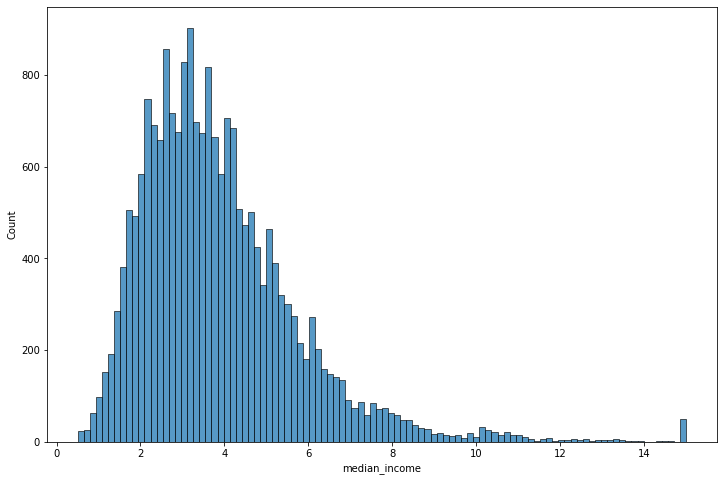

In [33]:
plt.figure(figsize=(12,8))
sns.histplot(data = df.median_income, bins=100)

We can see that this feature is already scaled and we have values between 1 and 15, and the most frequent value is around 2 and 4.

To see the relationship between the median income and median house price, we have to use scatterplot:

<AxesSubplot: xlabel='median_income', ylabel='median_house_value'>

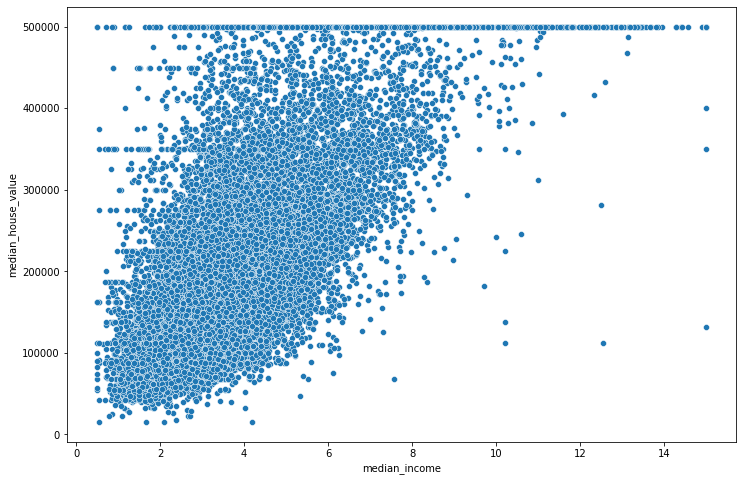

In [34]:
plt.figure(figsize=(12,8))
sns.scatterplot(data=df, x="median_income", y="median_house_value")

Now we are going to create a regressionplot with a linear regression line for the median income and median house price, we can use seaborn plot:

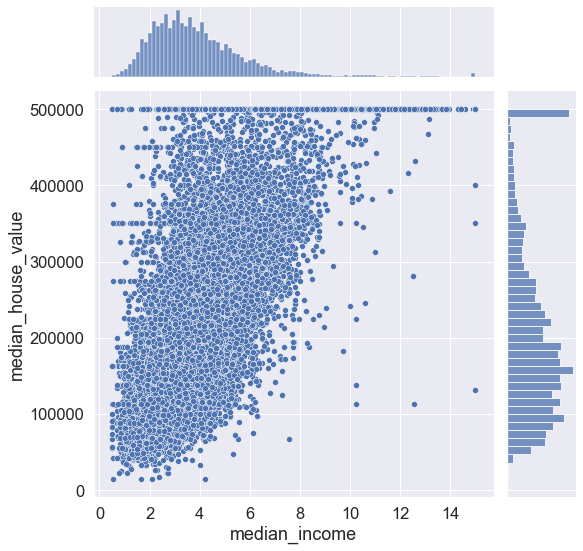

In [35]:
sns.set(font_scale=1.5)
sns.jointplot(data=df, x="median_income", y="median_house_value", kind="scatter", height=8)

Here we can see the histogram for house value and inclome.
To add the regression line:

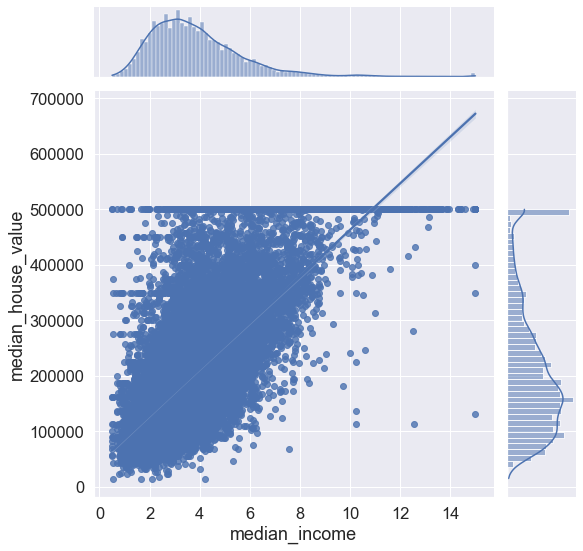

In [36]:
sns.set(font_scale=1.5)
sns.jointplot(data=df, x="median_income", y="median_house_value", kind="reg", height=8)

We can also create a scatterplot showing longitude and latitude and also determine the size of data points by the population. The higher the population in the district the bigger the data point.

<AxesSubplot: xlabel='longitude', ylabel='latitude'>

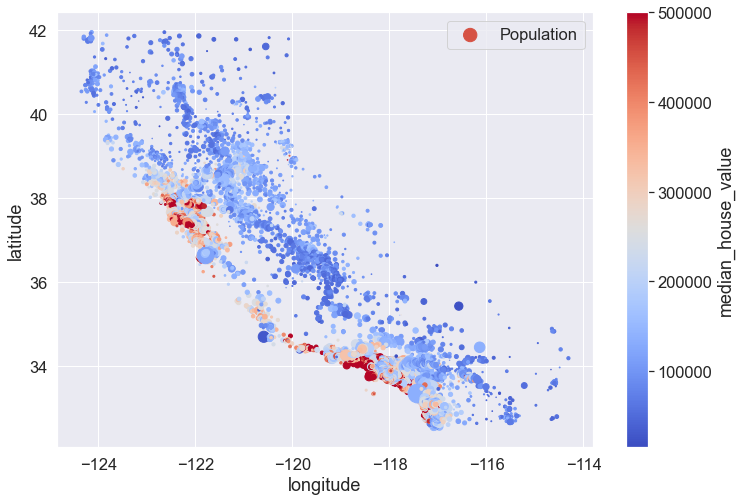

In [37]:
df.plot(kind="scatter", x="longitude", y="latitude", s=df.population/100, label="Population", 
        c="median_house_value", cmap="coolwarm", figsize=(12,8), sharex=False)


If we take a close look at our graph we can see the shape of California. It would be nice if we include a map of california. For that we have to import matplotlib.image.

I put the image california.png in the same folder that I have housing.csv file.

the matplotlib actually read the image into an array, represented by a matrix with number.

In [38]:
import matplotlib.image as mplimg

In [39]:
california_image = mplimg.imread("california.png")

In [40]:
california_image

array([[[0.627451 , 0.7764706, 0.9137255, 1.       ],
        [0.627451 , 0.7764706, 0.9137255, 1.       ],
        [0.627451 , 0.7764706, 0.9137255, 1.       ],
        ...,
        [0.9647059, 0.827451 , 0.6666667, 1.       ],
        [0.9647059, 0.827451 , 0.6666667, 1.       ],
        [0.9647059, 0.827451 , 0.6666667, 1.       ]],

       [[0.627451 , 0.7764706, 0.9137255, 1.       ],
        [0.627451 , 0.7764706, 0.9137255, 1.       ],
        [0.627451 , 0.7764706, 0.9137255, 1.       ],
        ...,
        [0.9647059, 0.827451 , 0.6666667, 1.       ],
        [0.9647059, 0.827451 , 0.6666667, 1.       ],
        [0.9647059, 0.827451 , 0.6666667, 1.       ]],

       [[0.627451 , 0.7764706, 0.9137255, 1.       ],
        [0.627451 , 0.7764706, 0.9137255, 1.       ],
        [0.627451 , 0.7764706, 0.9137255, 1.       ],
        ...,
        [0.9647059, 0.827451 , 0.6666667, 1.       ],
        [0.9647059, 0.827451 , 0.6666667, 1.       ],
        [0.9647059, 0.827451 , 0.666666

We can change here the axis labels and we can define a new axis labels and put the longtitud and latitude. We can do that with the "extend" parameter. But before that we have to search for the coordinate 

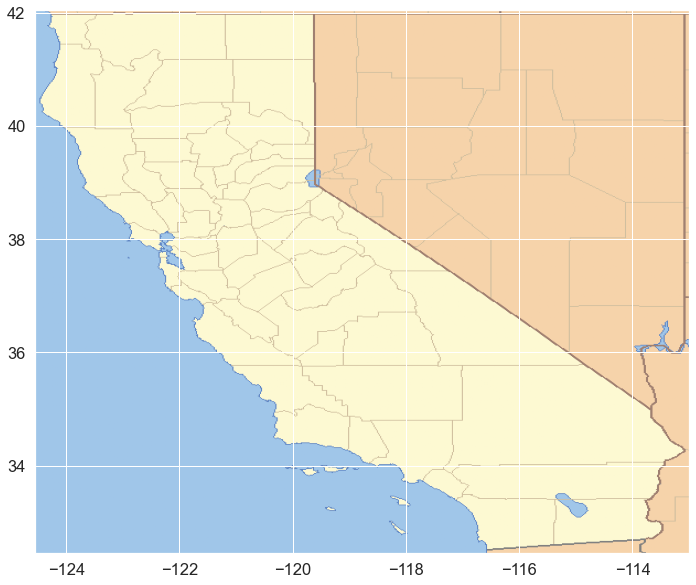

In [41]:
plt.figure(figsize=(15,10))
plt.imshow(california_image, extent=[-124.55,-113, 32.45,42.05])

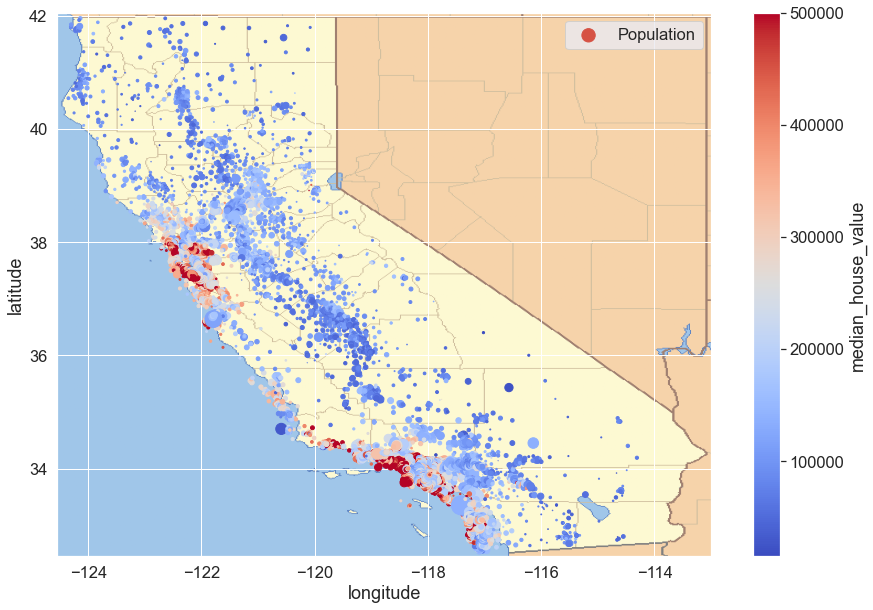

In [42]:
df.plot(kind="scatter", x="longitude", y="latitude", s=df.population/100, label="Population", 
        c="median_house_value", cmap="coolwarm", figsize=(15,10), sharex=False)
plt.imshow(california_image, extent=[-124.55,-113, 32.45,42.05])

plt.show()

Here we can see clearly that the more expensive houses and districts arenear the ocean.

In [43]:
df.ocean_proximity.value_counts()

<1H OCEAN     9034
INLAND        6496
NEAR OCEAN    2628
NEAR BAY      2270
ISLAND           5
Name: ocean_proximity, dtype: int64

In [44]:
df_loc=df[df.ocean_proximity==df.ocean_proximity.value_counts().index[2]]
df_loc.head(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,population_per_household,bedrooms_per_rooms
1850,-124.17,41.80,16,2739,480.0,1259,436,3.7557,109400,NEAR OCEAN,6.282110,2.887615,0.175246
1851,-124.30,41.80,19,2672,552.0,1298,478,1.9797,85800,NEAR OCEAN,5.589958,2.715481,0.206587
1852,-124.23,41.75,11,3159,616.0,1343,479,2.4805,73200,NEAR OCEAN,6.594990,2.803758,0.194998
1853,-124.21,41.77,17,3461,722.0,1947,647,2.5795,68400,NEAR OCEAN,5.349304,3.009274,0.208610
1854,-124.19,41.78,15,3140,714.0,1645,640,1.6654,74600,NEAR OCEAN,4.906250,2.570312,0.227389


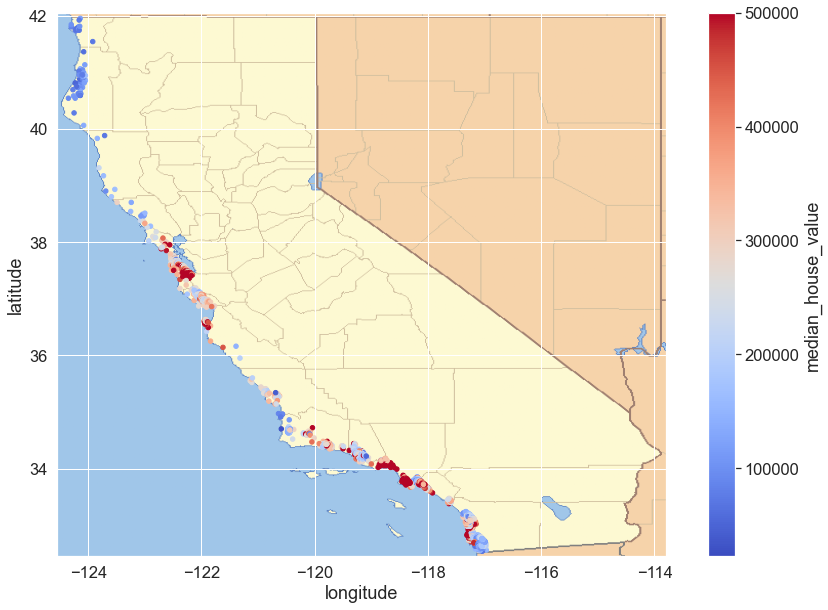

In [45]:
df_loc.plot (kind="scatter", x="longitude", y="latitude", 
             c="median_house_value", cmap="coolwarm", figsize=(15,10), sharex=False)

plt.imshow(california_image, extent=[-124.55,-113.80, 32.45,42.05])

Se we can decide that location matters. But there is no lineal relationship between latitude and longitude and house prices.

With a non-lineal machine learning model like the random forest regress we should be able to capture the relationship between the location and house prices. 

Here it is beneficial to convert the numerical feature to categorical feature, here in five categories as below and add it in a new column:


In [46]:
pd.qcut(df.median_income, q=[0, 0.25, 0.5, 0.75, 0.95, 1])

0           (7.3, 15.0]
1           (7.3, 15.0]
2          (4.744, 7.3]
3          (4.744, 7.3]
4        (3.536, 4.744]
              ...      
20635    (0.499, 2.564]
20636    (0.499, 2.564]
20637    (0.499, 2.564]
20638    (0.499, 2.564]
20639    (0.499, 2.564]
Name: median_income, Length: 20433, dtype: category
Categories (5, interval[float64, right]): [(0.499, 2.564] < (2.564, 3.536] < (3.536, 4.744] < (4.744, 7.3] < (7.3, 15.0]]

In [47]:
df["income_category"] = pd.qcut(df.median_income, q=[0, 0.25, 0.5, 0.75, 0.95, 1], 
            labels=["low", "Below_Average", "Above_Average", "High", "Very_High"])

In [48]:
df["income_category"]

0            Very_High
1            Very_High
2                 High
3                 High
4        Above_Average
             ...      
20635              low
20636              low
20637              low
20638              low
20639              low
Name: income_category, Length: 20433, dtype: category
Categories (5, object): ['low' < 'Below_Average' < 'Above_Average' < 'High' < 'Very_High']

In [49]:
df.income_category.value_counts().sort_values()

Very_High        1022
High             4085
Below_Average    5108
low              5109
Above_Average    5109
Name: income_category, dtype: int64

For getting the relative count instead of getting the absolut count we can set normalize to true:

In [50]:
df.income_category.value_counts(normalize=True).sort_values()

Very_High        0.050017
High             0.199922
Below_Average    0.249988
low              0.250037
Above_Average    0.250037
Name: income_category, dtype: float64

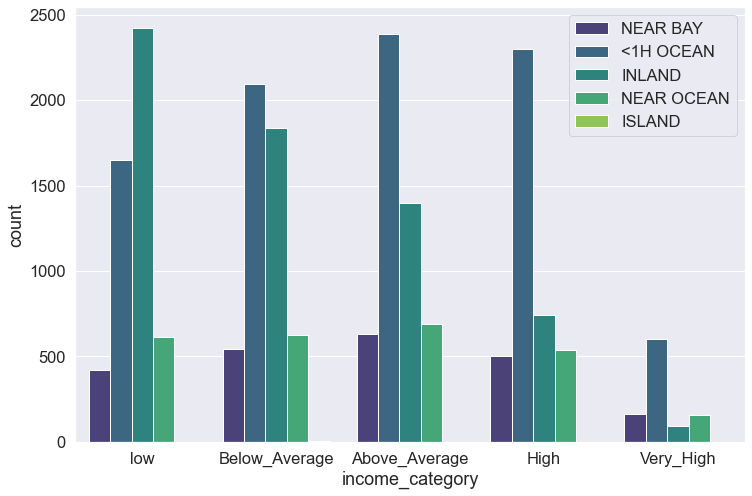

In [51]:
plt.figure(figsize=(12,8))
sns.countplot(data=df, x="income_category", hue="ocean_proximity", palette="viridis")
plt.legend(loc=1)

Here we split the income_category by the ocean_proximity. We can see that distric with lower income mainly are located in Inland and distric with above avarage and high income mainly located of 1H to the ocean.

The black line indicate that the avarge prices in ISLAND has a huge diviations.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


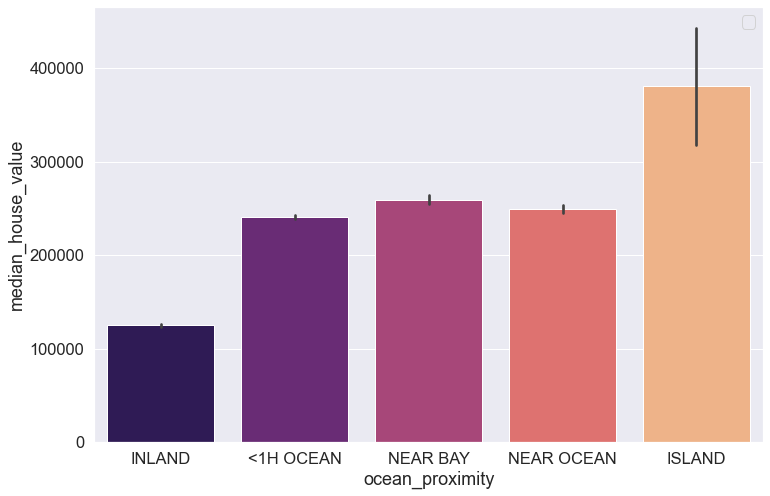

In [52]:
plt.figure(figsize=(12,8))
sns.barplot(data=df.sort_values("median_house_value"), x="ocean_proximity", y="median_house_value", palette="magma")
plt.legend(loc=1)

In [53]:
df.groupby(["ocean_proximity", "income_category"]).median_house_value.mean().unstack()

income_category,low,Below_Average,Above_Average,High,Very_High
ocean_proximity,,,,,
<1H OCEAN,161337.076923,197236.013829,232278.358759,292208.766217,439784.235489
INLAND,84820.626650,115124.088283,147846.891351,208095.566622,347571.736842
ISLAND,450000.000000,363050.000000,NaN,NaN,NaN
NEAR BAY,155122.052133,220196.177656,261965.251582,322566.033663,451015.078788
NEAR OCEAN,148027.826514,208665.190096,255293.813584,337446.227778,468739.723270


In [54]:
df_heatmap=df.groupby(["income_category","ocean_proximity"]).median_house_value.mean().unstack().drop(columns=["ISLAND"])

<AxesSubplot: xlabel='ocean_proximity', ylabel='income_category'>

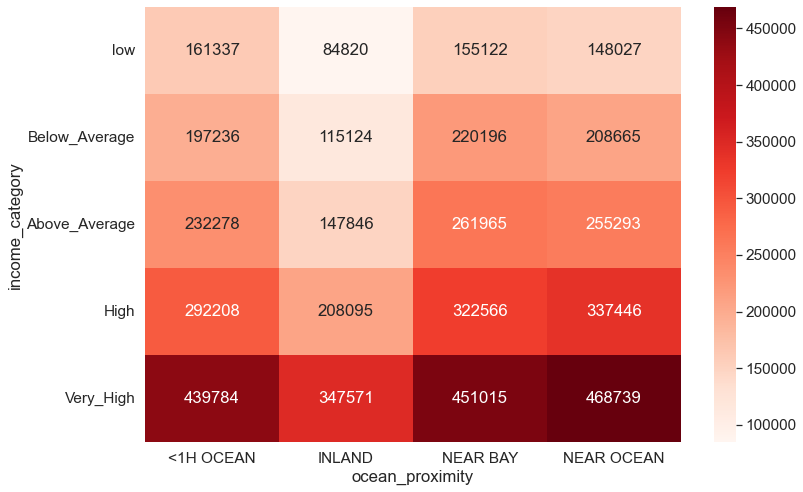

In [55]:
plt.figure(figsize=(12,8))
sns.set(font_scale=1.4)
sns.heatmap(data=df_heatmap.astype("int"), annot=True, cmap="Reds", fmt="d")

The colorbar with light colors means that the median income

## Feature Engineering for Machine Learning Models

Before we can create a machine learning model we have to transform some features. First we have to separate features and labels for forecaste the house prices.

In [56]:
label = df.median_house_value.copy()

In [57]:
features = df.drop(columns=["median_house_value"])

In [58]:
features

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,rooms_per_household,population_per_household,bedrooms_per_rooms,income_category
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY,6.984127,2.555556,0.146591,Very_High
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,6.238137,2.109842,0.155797,Very_High
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY,8.288136,2.802260,0.129516,High
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY,5.817352,2.547945,0.184458,High
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY,6.281853,2.181467,0.172096,Above_Average
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25,1665,374.0,845,330,1.5603,INLAND,5.045455,2.560606,0.224625,low
20636,-121.21,39.49,18,697,150.0,356,114,2.5568,INLAND,6.114035,3.122807,0.215208,low
20637,-121.22,39.43,17,2254,485.0,1007,433,1.7000,INLAND,5.205543,2.325635,0.215173,low
20638,-121.32,39.43,18,1860,409.0,741,349,1.8672,INLAND,5.329513,2.123209,0.219892,low


We have to know that machine learning algorithms do not perform well with different scales in data. In column of population we are in thousands and in median income we are between 1 and 15.

There are severals methods to normalize numerical features and all pros and cons, it deponds on the ML model.

In our case we  standardize the numerical features by calculation zscore values.

In [59]:
features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20433 entries, 0 to 20639
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   longitude                 20433 non-null  float64 
 1   latitude                  20433 non-null  float64 
 2   housing_median_age        20433 non-null  int64   
 3   total_rooms               20433 non-null  int64   
 4   total_bedrooms            20433 non-null  float64 
 5   population                20433 non-null  int64   
 6   households                20433 non-null  int64   
 7   median_income             20433 non-null  float64 
 8   ocean_proximity           20433 non-null  object  
 9   rooms_per_household       20433 non-null  float64 
 10  population_per_household  20433 non-null  float64 
 11  bedrooms_per_rooms        20433 non-null  float64 
 12  income_category           20433 non-null  category
dtypes: category(1), float64(7), int64(4), object(1

In [60]:
import scipy.stats as stats

In [61]:
features

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,rooms_per_household,population_per_household,bedrooms_per_rooms,income_category
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY,6.984127,2.555556,0.146591,Very_High
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,6.238137,2.109842,0.155797,Very_High
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY,8.288136,2.802260,0.129516,High
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY,5.817352,2.547945,0.184458,High
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY,6.281853,2.181467,0.172096,Above_Average
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25,1665,374.0,845,330,1.5603,INLAND,5.045455,2.560606,0.224625,low
20636,-121.21,39.49,18,697,150.0,356,114,2.5568,INLAND,6.114035,3.122807,0.215208,low
20637,-121.22,39.43,17,2254,485.0,1007,433,1.7000,INLAND,5.205543,2.325635,0.215173,low
20638,-121.32,39.43,18,1860,409.0,741,349,1.8672,INLAND,5.329513,2.123209,0.219892,low


In [62]:
feat1= features.select_dtypes("float").apply(lambda x: stats.zscore(x))
feat1

,longitude,latitude,total_bedrooms,median_income,rooms_per_household,population_per_household,bedrooms_per_rooms
0,-1.327314,1.051717,-0.970325,2.345163,0.625395,-0.049433,-1.146024
1,-1.322323,1.042355,1.348276,2.332632,0.324942,-0.092134,-0.987254
2,-1.332305,1.037674,-0.825561,1.782939,1.150594,-0.025797,-1.440514
3,-1.337296,1.037674,-0.718768,0.932970,0.155467,-0.050162,-0.492925
4,-1.337296,1.037674,-0.611974,-0.013143,0.342549,-0.085272,-0.706141
...,...,...,...,...,...,...,...
20635,-0.758318,1.800677,-0.388895,-1.216727,-0.155420,-0.048949,0.199820
20636,-0.818212,1.805358,-0.920488,-0.692044,0.274959,0.004912,0.037412
20637,-0.823203,1.777272,-0.125472,-1.143171,-0.090943,-0.071460,0.036808
20638,-0.873115,1.777272,-0.305834,-1.055136,-0.041013,-0.090853,0.118204


In [63]:
pd.options.display.float_format="{:.2f}".format

By calculating the mean and standard deviation, you can see that the mean value of all column is 0 and std is 1. That is exactly the definition of standardizing features.

In [64]:
feat1.agg(["mean", "std"])

,longitude,latitude,total_bedrooms,median_income,rooms_per_household,population_per_household,bedrooms_per_rooms
mean,-0.00,0.00,-0.00,0.00,-0.00,-0.00,0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00


Machine learning algorithm can not handle text or categorical data, therefore we have to transform them into numbers.

In [65]:
features.ocean_proximity.value_counts()

<1H OCEAN     9034
INLAND        6496
NEAR OCEAN    2628
NEAR BAY      2270
ISLAND           5
Name: ocean_proximity, dtype: int64

We can transform each of these categorical features into a column with binary values, 1 or 0. This also called dummy variables.

In [66]:
dummies = pd.get_dummies(features.ocean_proximity)
dummies

,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,0,0,0,1,0
1,0,0,0,1,0
2,0,0,0,1,0
3,0,0,0,1,0
4,0,0,0,1,0
...,...,...,...,...,...
20635,0,1,0,0,0
20636,0,1,0,0,0
20637,0,1,0,0,0
20638,0,1,0,0,0


In [67]:
features= pd.concat([feat1, dummies, df.income_category], axis=1)
features

,longitude,latitude,total_bedrooms,median_income,rooms_per_household,population_per_household,bedrooms_per_rooms,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,income_category
0,-1.33,1.05,-0.97,2.35,0.63,-0.05,-1.15,0,0,0,1,0,Very_High
1,-1.32,1.04,1.35,2.33,0.32,-0.09,-0.99,0,0,0,1,0,Very_High
2,-1.33,1.04,-0.83,1.78,1.15,-0.03,-1.44,0,0,0,1,0,High
3,-1.34,1.04,-0.72,0.93,0.16,-0.05,-0.49,0,0,0,1,0,High
4,-1.34,1.04,-0.61,-0.01,0.34,-0.09,-0.71,0,0,0,1,0,Above_Average
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-0.76,1.80,-0.39,-1.22,-0.16,-0.05,0.20,0,1,0,0,0,low
20636,-0.82,1.81,-0.92,-0.69,0.27,0.00,0.04,0,1,0,0,0,low
20637,-0.82,1.78,-0.13,-1.14,-0.09,-0.07,0.04,0,1,0,0,0,low
20638,-0.87,1.78,-0.31,-1.06,-0.04,-0.09,0.12,0,1,0,0,0,low


## Splitting the Data into training and test set

It is common to use 80%of data por training and 20% for testing the models, but this depends on the volumn of the dataset. If we have millions rows of data it might be enough to have a test set of one or two percent.

Pandas has a method for sampling data.

We also define so called random_state to which we can pass any number. As long as you use the very same number, the result of the sample will be the same.

In [68]:
test_size=0.2

In [69]:
X_test = features.sample(frac=test_size, random_state=123)

In [70]:
X_test

,longitude,latitude,total_bedrooms,median_income,rooms_per_household,population_per_household,bedrooms_per_rooms,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,income_category
14354,1.17,-1.35,0.27,-0.39,-0.56,-0.09,0.99,0,0,0,0,1,Below_Average
12908,-0.86,1.40,-0.03,-0.29,0.18,-0.04,-0.51,0,1,0,0,0,Below_Average
19545,-0.70,0.93,0.16,-1.14,-0.62,0.03,0.76,0,1,0,0,0,low
12188,1.11,-0.91,-0.72,-0.40,0.42,-0.00,-0.36,1,0,0,0,0,Below_Average
14786,1.22,-1.43,-0.58,0.50,0.16,0.02,-0.75,0,0,0,0,1,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10262,0.85,-0.82,0.01,1.43,0.77,0.04,-1.33,1,0,0,0,0,High
3614,0.58,-0.65,-1.04,-0.39,-0.21,0.09,-0.12,1,0,0,0,0,Below_Average
19296,-1.62,1.30,-0.27,0.01,0.09,-0.06,-0.64,1,0,0,0,0,Above_Average
5826,0.63,-0.68,-0.62,0.49,0.43,-0.02,-0.87,1,0,0,0,0,High


It is important to have it present that there is a risk in random sampling and that is the sample is not representative of the whole data set. 
In our case we have seen until now that the median income is the most important feature. So having all low income districts in the training set and have all high income districts in the test set would not be representative and that could lead to a poor model. Therefore me should make sure that the five income categories in test and training set have the same ratio as the whole data set.

In [71]:
features.income_category.value_counts(normalize=True)

low             0.25
Above_Average   0.25
Below_Average   0.25
High            0.20
Very_High       0.05
Name: income_category, dtype: float64

In [72]:
X_test.income_category.value_counts(normalize=True)

Above_Average   0.25
Below_Average   0.25
low             0.25
High            0.20
Very_High       0.05
Name: income_category, dtype: float64

In [73]:
X_train=features.loc[~features.index.isin(X_test.index)]
X_train

,longitude,latitude,total_bedrooms,median_income,rooms_per_household,population_per_household,bedrooms_per_rooms,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,income_category
0,-1.33,1.05,-0.97,2.35,0.63,-0.05,-1.15,0,0,0,1,0,Very_High
1,-1.32,1.04,1.35,2.33,0.32,-0.09,-0.99,0,0,0,1,0,Very_High
2,-1.33,1.04,-0.83,1.78,1.15,-0.03,-1.44,0,0,0,1,0,High
3,-1.34,1.04,-0.72,0.93,0.16,-0.05,-0.49,0,0,0,1,0,High
4,-1.34,1.04,-0.61,-0.01,0.34,-0.09,-0.71,0,0,0,1,0,Above_Average
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-0.76,1.80,-0.39,-1.22,-0.16,-0.05,0.20,0,1,0,0,0,low
20636,-0.82,1.81,-0.92,-0.69,0.27,0.00,0.04,0,1,0,0,0,low
20637,-0.82,1.78,-0.13,-1.14,-0.09,-0.07,0.04,0,1,0,0,0,low
20638,-0.87,1.78,-0.31,-1.06,-0.04,-0.09,0.12,0,1,0,0,0,low


Now it´s time to drop the categorical columns:

In [74]:
X_train.drop(columns=["income_category"], inplace=True)

C:\Users\ginza\AppData\Local\Temp/ipykernel_9152/2853736111.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.drop(columns=["income_category"], inplace=True)


In [75]:
X_test.drop(columns=["income_category"], inplace=True)

Now we have the final train and test features and we have to set the labels for each of them:

In [76]:
y_train = label.loc[X_train.index]
y_test = label.loc[X_test.index]

## Training the ML Model (Random Forest Regressor)

Now we have to train our model. The question is which model we have to use. There is few regression models available. Based on data analysis we have seen that our most important feature that influence house prices dose not hase a lineal realationship. So we should not use lineal regression model and therefore we should select a model can capture a non lineal relationship. The Random Forest Regressor is such a model. First we import it.

In [77]:
from sklearn.ensemble import RandomForestRegressor

In [78]:
forest_reg = RandomForestRegressor (random_state=42, n_estimators=500,
                                         max_features="sqrt", max_depth=75, min_samples_split=2)

Now we can train our model:

In [79]:
forest_reg.fit(X_train, y_train)

RandomForestRegressor(max_depth=75, max_features='sqrt', n_estimators=500,
                      random_state=42)

Before the test our model with the test set we can verify how well our model fit the training set, in other world how well we can predict the house price.

There is a matrix to measure the fit. First we concider the coeficient of determination or short squared which shows vales between 0 and 1: 0 indicating no fit at all and 1 indication the perfect fit.

We can get the squared with method "score".

In [81]:
forest_reg.score(X_train, y_train)

0.9761648802021616

In [95]:
pred=forest_reg.predict(X_train)

In [96]:
pred

array([431850.84 , 380564.096, 372689.68 , ...,  86750.8  ,  86134.4  ,
        90992.2  ])

In [97]:
from sklearn.metrics import mean_squared_error

In [98]:
forest_mse=mean_squared_error(y_train, pred)
forest_rmse=np.sqrt(forest_mse)
forest_rmse

17904.704550184153

## Evaluating the Model on the Test Set

Finally we are now evaluating our model and we try the prediction error with coeficient of determination and also mean squared error and finally we try to find some more intuitive metrics for the accuracy of our model.

In [104]:
forest_reg.score(X_test, y_test)

0.8225642749000133

In [105]:
pred=forest_reg.predict (X_test)
pred

array([246140.406, 130697.2  ,  71487.8  , ..., 217061.806, 298584.21 ,
       267843.4  ])

In [107]:
forest_mse = mean_squared_error(y_test, pred)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

47697.50856644928

Lets simply compare the predicted values with the true values:

In [110]:
comp = pd.DataFrame(data={"True_values": y_test, "Predicted_values": pred})
comp

,True_values,Predicted_values
14354,101800,246140.41
12908,213000,130697.20
19545,58800,71487.80
12188,111300,171948.21
14786,174100,161741.40
...,...,...
10262,272200,297109.60
3614,175900,180560.80
19296,215900,217061.81
5826,326100,298584.21


Here we can see that for some observation of some districts the difference is pretty high. To calculate the difference between them we can do :

In [113]:
comp.True_values.sub(comp.Predicted_values).abs().mean()

31623.578448739903

We have created a good but not perfect model. Now let´s get some more insight.

The conclusion is that the income is the most important factor followed by the location. The good new is that the random forest regressor can give us the importance of the features for the model

In [114]:
forest_reg.feature_importances_

array([0.10648917, 0.09726977, 0.03505884, 0.28311633, 0.0836332 ,
       0.11510884, 0.10461606, 0.02011995, 0.1382054 , 0.00032243,
       0.00643459, 0.00962544])

In [120]:
feature_imp=pd.Series(data=forest_reg.feature_importances_, index=X_train.columns).sort_values(ascending=False)
feature_imp

median_income              0.28
INLAND                     0.14
population_per_household   0.12
longitude                  0.11
bedrooms_per_rooms         0.10
latitude                   0.10
rooms_per_household        0.08
total_bedrooms             0.04
<1H OCEAN                  0.02
NEAR OCEAN                 0.01
NEAR BAY                   0.01
ISLAND                     0.00
dtype: float64

<AxesSubplot: >

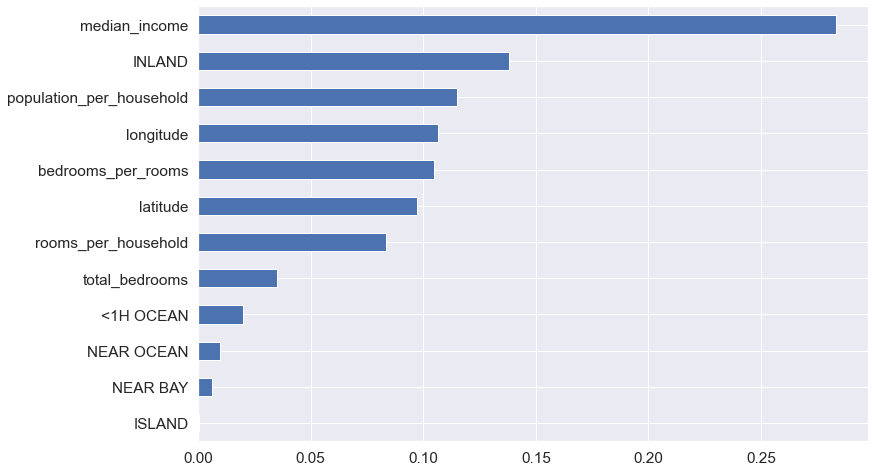

In [129]:
feature_imp.sort_values(ascending=True).plot.barh(figsize=(12,8))